<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_beat_DTW_csv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Heart rate equqlization function

In [11]:
from scipy.signal import find_peaks
def rescale(arr, no_samples):
    n = len(arr)
    factor = no_samples/n
    return np.interp(np.linspace(0, n, int(factor*n+1)), np.arange(n), arr)

def heart_rate_equqlization(data_frame,no_samples,n_signals = 10001,p_threshold = 0.7):
  eq_rate_data = pd.DataFrame()
  for i in range(n_signals):
    print("signal number ",i)
    peaks, _ = find_peaks(data_frame.loc[i], height=p_threshold)
    
    np_sig = data_frame.iloc[i,:].values
    #print("original signal : ")
    #print(np_sig)
    #print("=============================")

    mid_peak = peaks[int(len(peaks)/2)]
    start = mid_peak
    stop =peaks[int(len(peaks)/2)+1]
    np_sig = np_sig[start:stop]
    #print("cuted signal [np_signale] \n ",np_sig)
    #print("=============================")
    
    
    scaled = rescale(np_sig,no_samples)
    df = pd.DataFrame(data = np.transpose(scaled) )
    #print("final shape is ",df.values.shape)
    #print(df.values)
    #print("**************************************")
    eq_rate_data = pd.concat([eq_rate_data , df],axis = 1,ignore_index=True)
  return eq_rate_data.transpose()

# reading data

In [12]:
ppg_csv2 = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/2.csv")
ppg_csv2.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.62666,0.54721,0.47260,0.40627,0.35051,0.30641,0.27399,0.25228,0.23964,0.23397,...,0.74482,0.82479,0.88590,0.92470,0.93946,0.93015,0.89849,0.84767,0.78203,0.70660
1,0.03850,0.05744,0.08861,0.13297,0.19053,0.26018,0.33985,0.42655,0.51669,0.60637,...,0.05267,0.05805,0.06082,0.06036,0.05660,0.05009,0.04208,0.03443,0.02951,0.02998
2,0.02279,0.02457,0.02600,0.02805,0.03210,0.03981,0.05300,0.07341,0.10256,0.14146,...,0.00840,0.00365,0.00080,0.00000,0.00116,0.00397,0.00790,0.01232,0.01658,0.02016
3,0.24520,0.26009,0.27128,0.27849,0.28182,0.28170,0.27876,0.27377,0.26749,0.26060,...,0.11479,0.11281,0.11491,0.12155,0.13270,0.14788,0.16619,0.18644,0.20725,0.22726
4,0.57657,0.50368,0.42721,0.35303,0.28631,0.23107,0.18983,0.16350,0.15142,0.15160,...,0.37350,0.45685,0.53778,0.61003,0.66785,0.70663,0.72333,0.71686,0.68809,0.63987


In [13]:
ppg_csv2.shape

(10001, 1024)

In [14]:
scaled_df = heart_rate_equqlization(ppg_csv2,no_samples = 64,n_signals = 10001,p_threshold = 0.7)

Streaming output truncated to the last 5000 lines.
signal number  5001
signal number  5002
signal number  5003
signal number  5004
signal number  5005
signal number  5006
signal number  5007
signal number  5008
signal number  5009
signal number  5010
signal number  5011
signal number  5012
signal number  5013
signal number  5014
signal number  5015
signal number  5016
signal number  5017
signal number  5018
signal number  5019
signal number  5020
signal number  5021
signal number  5022
signal number  5023
signal number  5024
signal number  5025
signal number  5026
signal number  5027
signal number  5028
signal number  5029
signal number  5030
signal number  5031
signal number  5032
signal number  5033
signal number  5034
signal number  5035
signal number  5036
signal number  5037
signal number  5038
signal number  5039
signal number  5040
signal number  5041
signal number  5042
signal number  5043
signal number  5044
signal number  5045
signal number  5046
signal number  5047
signal nu

In [15]:
print(scaled_df.isna().sum(axis = 1))


0        0
1        0
2        0
3        0
4        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Length: 10001, dtype: int64


In [16]:
scaled_df.shape

(10001, 65)

[67]
         0         1         2         3         4         5         6   \
67  0.99443  0.983973  0.960537  0.931995  0.901575  0.867356  0.824489   

          7         8         9   ...       55        56        57        58  \
67  0.769132  0.700287  0.620692  ...  0.11125  0.183507  0.293391  0.430491   

          59       60        61        62        63       64  
67  0.579637  0.72251  0.840637  0.925047  0.973539  0.98474  

[1 rows x 65 columns]


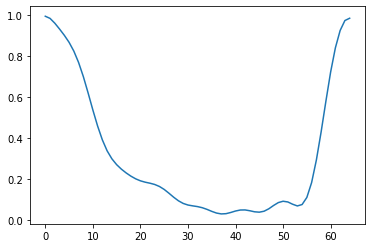

In [17]:
from numpy.random import randint

# generate some integers
row = randint(0, 100, 1)
print(row)
ppg_sig = scaled_df.iloc[row,:]
print(ppg_sig)
plt.plot(ppg_sig.values.T)

In [18]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.9 MB/s 


In [19]:
scaled_df.values.shape

(10001, 65)

Euclidean k-means
1.994 --> 1.530 --> 1.496 --> 1.486 --> 1.481 --> 1.477 --> 1.473 --> 1.469 --> 1.465 --> 1.462 --> 1.459 --> 1.456 --> 1.454 --> 1.451 --> 1.449 --> 1.446 --> 1.444 --> 1.442 --> 1.441 --> 1.440 --> 1.439 --> 1.439 --> 1.438 --> 1.437 --> 1.437 --> 1.436 --> 1.436 --> 1.436 --> 1.436 --> 1.436 --> 1.436 --> 1.436 --> 1.436 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 1.435 --> 


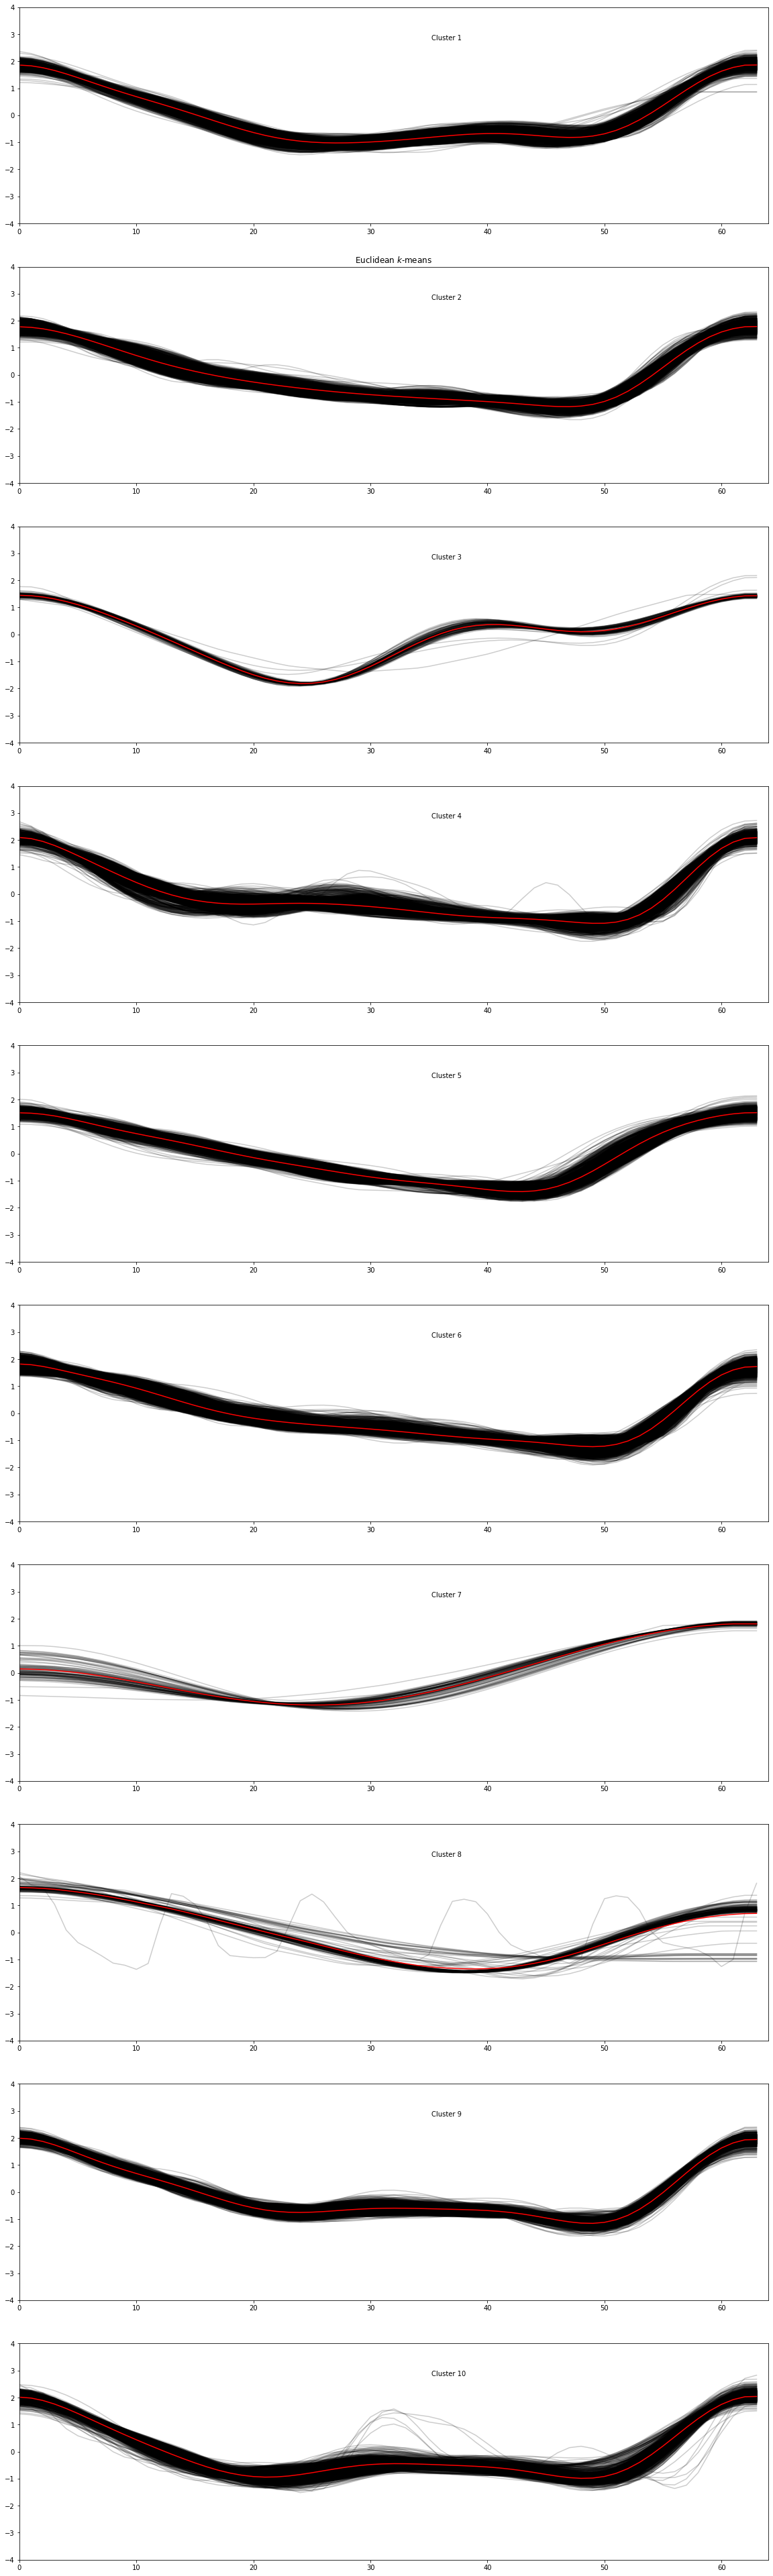

In [27]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=10, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)



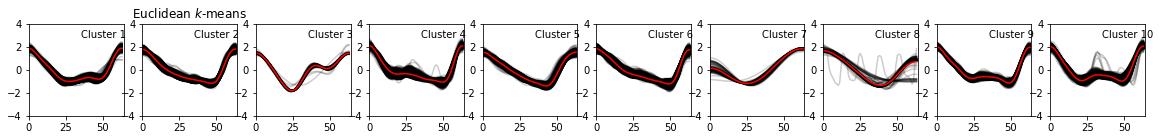

In [29]:
plt.figure(figsize=(20,20))
for yi in range(10):
    plt.subplot(10,10, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")



DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10001 out of 10001 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurren

0.363 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.3s finished


0.254 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.4s finished


0.249 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.247 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.8s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.0s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.1s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.8s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.1s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.9s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.9s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.5s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.9s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.246 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.1s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.5s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.6s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.7s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.6s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.0s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.5s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.1s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.9s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.6s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.1s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.8s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.2s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.7s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.9s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.6s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.0s finished


0.245 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.1s finished


0.245 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10001 out of 10001 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 40004 out of 40004 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurren

0.410 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.286 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.6s finished


0.281 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.279 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.6s finished


0.278 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.277 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.276 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.275 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.1s finished


0.275 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.7s finished


0.274 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.0s finished


0.274 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.7s finished


0.274 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.7s finished


0.273 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.6s finished


0.273 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.8s finished


0.273 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.3s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.9s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.2s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.6s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.8s finished


0.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.1s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.7s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.8s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.8s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.1s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   16.8s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.3s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.3s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.0s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.2s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   14.8s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   15.0s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.1s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.4s finished


0.271 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100010 out of 100010 | elapsed:   13.5s finished


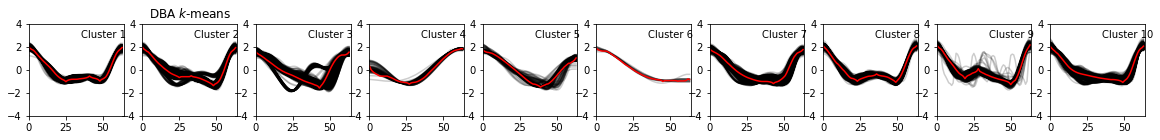

In [30]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=10,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)
plt.figure(figsize=(20,20))

for yi in range(10):
    plt.subplot(10, 10,1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")


Soft-DTW k-means
0.116 --> 0.095 --> 0.098 --> 0.100 --> 0.101 --> 0.102 --> 0.101 --> 0.101 --> 0.101 --> 0.101 --> 0.100 --> 0.101 --> 0.100 --> 0.101 --> 0.100 --> 0.101 --> 0.101 --> 0.101 --> 0.101 --> 0.101 --> 0.102 --> 0.102 --> 0.102 --> 0.102 --> 0.102 --> 0.102 --> 0.102 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.103 --> 0.104 --> 0.104 --> 0.104 --> 0.104 --> 0.104 --> 0.104 --> 0.104 --> 0.104 --> 


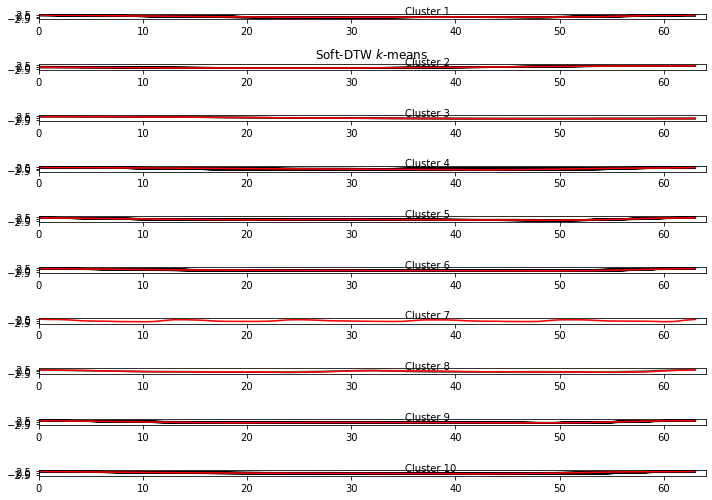

In [31]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=10,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)
plt.figure(figsize=(10,7))

for yi in range(10):
    plt.subplot(10, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

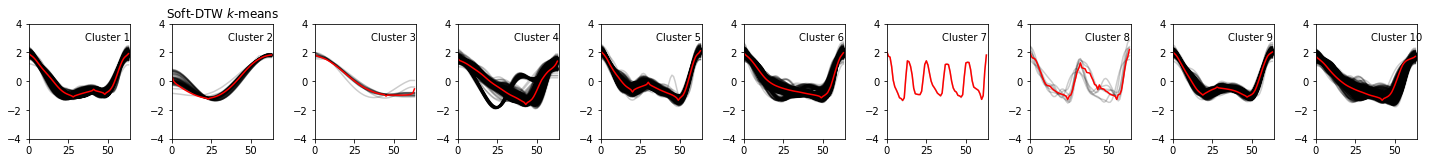

In [32]:
plt.figure(figsize=(20,20))

for yi in range(10):
    plt.subplot(10, 10, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()